<a href="https://colab.research.google.com/github/KratiMaheshwari09/DEMO/blob/main/Notebooks/mpox-resnet50_krati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

In [3]:
dataset_path = '/content/drive/MyDrive/Original_MonkeyPox_Dataset'

In [4]:
import os

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"The directory {dataset_path} does not exist. Please check the dataset path.")

print("Contents of the dataset directory:")
print(os.listdir(dataset_path))

Contents of the dataset directory:
['Monkeypox_Dataset_metadata.csv', 'Original Images', 'Fold1', 'Augmented Images']


In [5]:
train_path = os.path.join(dataset_path, 'Fold1/Train')
test_path = os.path.join(dataset_path, 'Fold1/Test')

In [6]:
train_path, test_path

('/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
 '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Test')

In [7]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)

Others
Monkeypox


Others


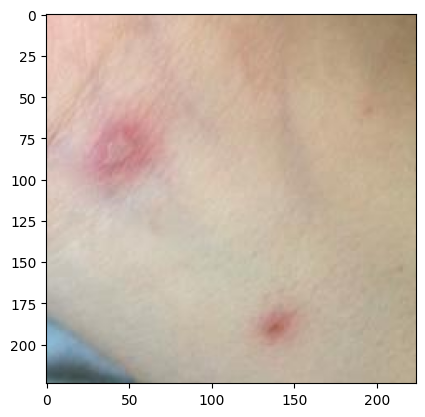

Monkeypox


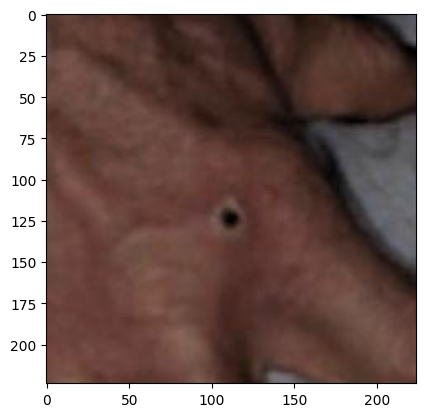

In [8]:
train_images = os.listdir(train_path)
for folder in train_images :
    images = os.listdir(train_path +'/'+ str(folder))
    print(folder)
    img = mpimg.imread(train_path +'/'+ str(folder) +'/'+images[7])
    imgplot = plt.imshow(img)
    plt.show()

In [9]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [10]:
Accuracy = {}

Loading the Training Dataset

In [20]:
labels = os.listdir(train_path)

img_size = 224
train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Train',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'binary',
    color_mode='rgb',
    validation_split = 0.3,
    subset='training',
    seed=22
)

Found 2142 files belonging to 2 classes.
Using 1500 files for training.


In [21]:
val_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Original_MonkeyPox_Dataset/Fold1/Val',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'binary',
    color_mode='rgb',
    validation_split = 0.3,
    subset='validation',
    seed=22
)

Found 420 files belonging to 2 classes.
Using 126 files for validation.


In [22]:

def get_model(base, preprocessor, img_size):
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
    return model


In [23]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)


In [24]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)


In [25]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6921 - loss: 0.6135 - val_accuracy: 0.5079 - val_loss: 2.6233
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.8847 - loss: 0.2772 - val_accuracy: 0.5238 - val_loss: 1.5323
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9470 - loss: 0.1553 - val_accuracy: 0.5476 - val_loss: 1.7654
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.9635 - loss: 0.1187 - val_accuracy: 0.6190 - val_loss: 1.1508
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9678 - loss: 0.0849 - val_accuracy: 0.8175 - val_loss: 0.4577
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9614 - loss: 0.0844 - val_accuracy: 0.6270 - val_loss: 1.3775
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9835 - loss: 0.0615 - val_accuracy: 0.6190 - val_loss: 1.6863
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9839 - loss: 0.0548 - val_accuracy: 0.6

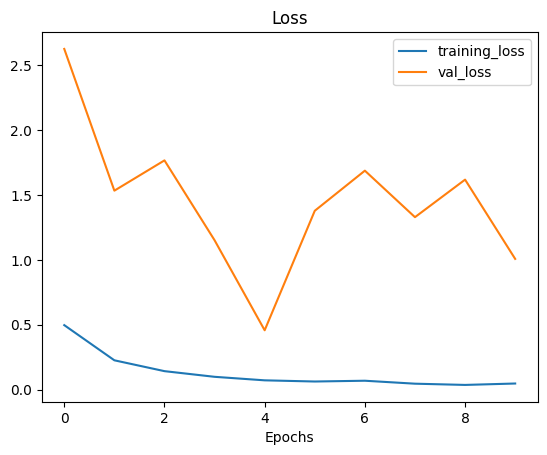

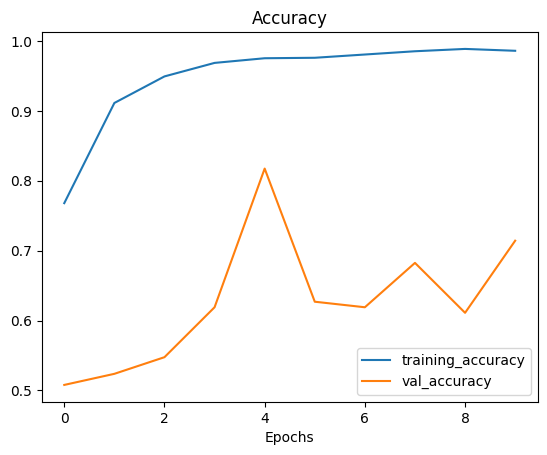

In [26]:
plot_loss_curves(history)

In [27]:
tf.keras.utils.plot_model(model, to_file='resnet50.png',expand_nested=True,show_shapes=True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534849 to fit



In [28]:
Accuracy['ResNet'] = history.history['accuracy'][-1]

In [29]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5951 - loss: 1.5318
test accuracy :  0.7142857313156128


In [30]:
model.save('resnet50.h5')